In [2]:
#general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import emoji
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

C:\Users\Juniarta\AppData\Local\Temp\ipykernel_1348\371226460.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

In [6]:
data = pd.read_csv('../Cleaning/Clean_Dataset.csv', encoding='iso-8859-1')
data = data[['Clean_Text', 'Stop_Words_Text', 'Stemming_Text', 'New_Location', 'indonlp_sentiment']]

In [7]:
df = data.iloc[:round(len(data)*0.8),:]
df_test = data.iloc[round(len(data)*0.8):,:]

In [8]:
df.shape

(34122, 5)

In [9]:
df_test.shape

(8531, 5)

In [10]:
tweets_per_country = data['New_Location'].value_counts().loc[lambda x : x > 100].reset_index(name='counts')
tweets_per_country = tweets_per_country[tweets_per_country['index'] != 'Indonesia']

C:\Users\Juniarta\AppData\Local\Temp\ipykernel_1348\3907243844.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x='index', y='counts', data=tweets_per_country,edgecolor = 'black',ci=False, palette='Spectral')


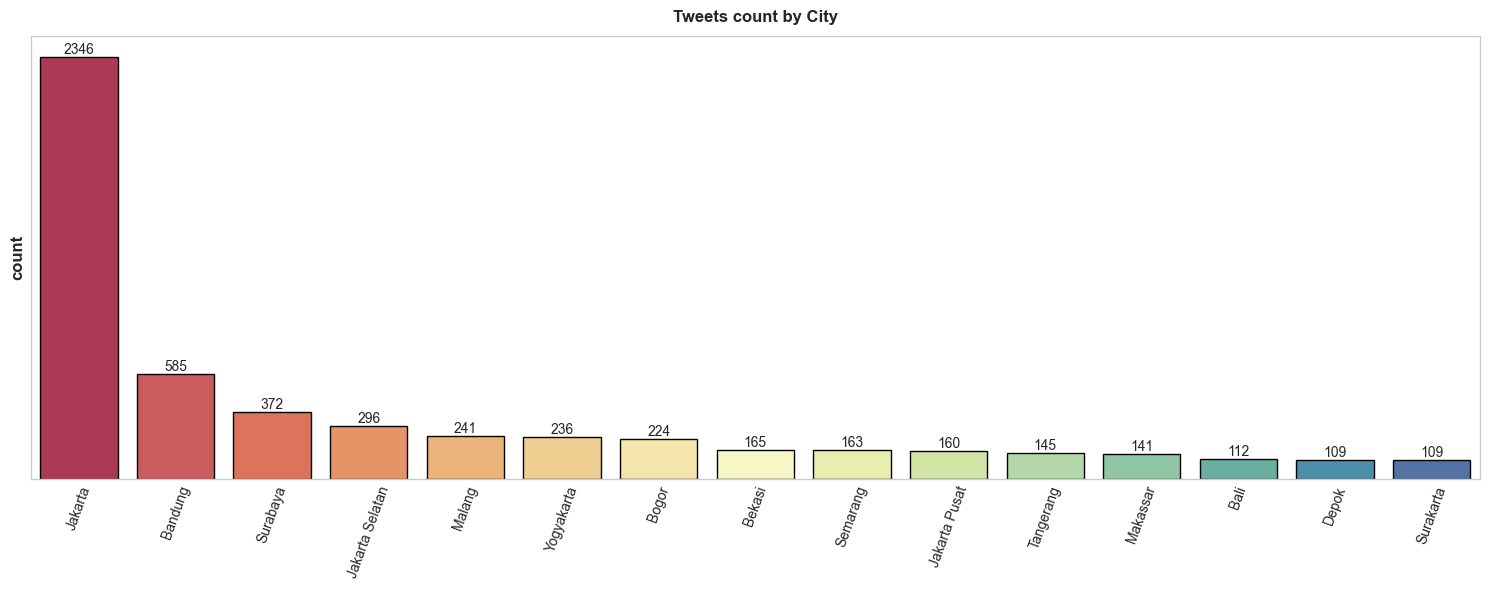

In [29]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='index', y='counts', data=tweets_per_country,edgecolor = 'black',ci=False, palette='Spectral')
plt.title('Tweets count by City')
plt.xticks(rotation=70)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

#### Tweets Deep Cleaning

In [25]:
text_len = []
for text in df.Clean_Text:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [26]:
df['text_len'] = text_len

In [27]:
text_len_test = []
for text in df_test.Clean_Text:
    tweet_len = len(text.split())
    text_len_test.append(tweet_len)

In [28]:
df_test['text_len'] = text_len_test

C:\Users\Juniarta\AppData\Local\Temp\ipykernel_1348\820323115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text_len'] = text_len_test


In [30]:
print(f" DF SHAPE: {df.shape}")
print(f" DF TEST SHAPE: {df_test.shape}")

 DF SHAPE: (34122, 7)
 DF TEST SHAPE: (8531, 6)


In [31]:
df = df[df['text_len'] > 4]

In [32]:
df_test = df_test[df_test['text_len'] > 4]

In [33]:
print(f" DF SHAPE: {df.shape}")
print(f" DF TEST SHAPE: {df_test.shape}")

 DF SHAPE: (34122, 7)
 DF TEST SHAPE: (8531, 6)


#### Training Data Deeper Cleaning

In [12]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [35]:
token_lens = []

for txt in df['Clean_Text'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [36]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 116


In [37]:
token_lens = []

for i,txt in enumerate(df['Clean_Text'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")  

INDEX: 31816, TEXT: sudah seperti robot saja tahun disuruh nonton tv jauh dari layar karena bisa ngerusak mata hp dilengkapi filter biru buat ngurangin cahaya masuk kemata metaverse dicekokin kemata langsung mau sampai kapan jadi orang bodoh dikibulin label modern
INDEX: 31817, TEXT: izin nambahin min bisa ikutan contest voxedit atau game design hampir tiap bulan ada yang bikin bisa dari sandbox oficial grup comunity atau project nft yang mau bikin versi metaverse avatarnya hadiahnya bagaimana masing penyelengara paling tingi idr
INDEX: 31818, TEXT: logikanya gini kalau duit kamu hilang di metaverse duit kamu hilang juga di real life tapi kalau kamu dapat duit di metaverse kamu dapat duit juga di real life gua deh ngebayangin parah banget masa depan bakal seperti bagaimana anjing
INDEX: 31819, TEXT: realy metaverse terdiri dari beberapa komponen yang pertama adalah avatar pemain yang tersedia untuk dibeli sebagai nft setiap avatar mengunakan pakaian virtual dari merek dunia nyata yang 

INDEX: 32508, TEXT: makin makin banyak yang engan menikah karena metaverse lebih nyaman dan kenakan dengan virtual reality apa saja sudah bisa dilakukan dengan gadgetnya masyarakat tidak bisa dikendalikan tapi masih punya kesadaran kalau kalau sudah merugakan baru sadar
INDEX: 32509, TEXT: relationship metaverse di beranda hati yang kutelusuri kamu terlalu fyp berkali kali scroling tidak mampu kuberpaling setiap kali aku stalking kamu nampak paling bening di deretan paling atas di pikiran paling dalam sinyalmu paling kuat pikatmu paling hebat
INDEX: 32510, TEXT: psi salah terus awalnya nyinyirin pembangunan circuit eh pembangunan circuit lancar karena manajemen yang baik dari anies sekarang topik nya jumlah penonton eh tong jaman metaverse penonton tidak perl datang kamu dungu banget iya apa turunan dungunya
INDEX: 32511, TEXT: kalau jelasin panjang gampangnya gini di game roblox kamu bisa bangun bangunan atau di fornite kamu bisa punya skin tapi di metaverse skin atau bangunan itu bis

INDEX: 33135, TEXT: pak mnrt saya iya mentaly kita juga perlu berkembang sebagai suatu bangsa kalau diperhatikan kita ini suka sekali terjebak atau senang dijebak oleh istilah milenial globalisasi dan sekarang metaverse karena takut dibilang tidak trendy dan ketingalan zaman
INDEX: 33136, TEXT: kan kamu bilang ini iya disitu bisa apa saja banyak layaknya didunia nyata bahkan kita bisa beli tanah dan bangun sesuatu lalu menyewakan ke orang lain di cn bapenas bilang cuma bisa lihat lihat iya itumah vr jadi yang g paham metaverse siapa
INDEX: 33137, TEXT: buset pemimpinya minta dan berharap ikn akan menjadi pusat metaverse tetapi dibalik itu ada pawang pintu alias orang pintar bukan dari teknologi sains ternyata pawangnya mencegah hujan gagal lagi tadi saja hujan deras banget disat mau bersiap race
INDEX: 33138, TEXT: soalnya emang kalau cuman genshin yang bermasalah iya kenapa tiga tiganya harus berubah soalnya tot sama honkai tidak kenapa kenapa kalau gasala alesan utamanya ganti nama i

INDEX: 33827, TEXT: saya belum mikir sampai situ sih karena memang bukan ilmu saya reng tapi pasti ada transaksi dalam metaverse tapi saya rasa hidup di metaverse bukan berarti meniadakan kehidupan nyata kita di metaverse iya melakukan hal yang ga bisa dilakukan di dunia nyata naik motor terbang misalnya
INDEX: 33828, TEXT: syarat boster kenapa repot banget sih iya mesti pakai login aplikasi pedulilindungi dulu kasian amat buat warga yang benar tidak mampu buat aford mobile phone deh benar vaksin seperti di negara luar sono yang tingal disuntik saja tidak perlu fafifu wasweswos big data metaverse bisa
INDEX: 33829, TEXT: melihat masa lalu mungkin bisa melalui visual tapi jika berpindah secara fisik ke masa lalu kyknya gk mungkin jikapun bisa itu mungkin di dunia virtual yang akn muncul yaitu metaverse klu di dunia nyata itu mustahil berpindah fisik ke masa depan atau masa lalu
INDEX: 33830, TEXT: saya pengen dong tampil keren depan client misalnya avatarnya saya pakein baju merk terken

In [38]:
df['token_lens'] = token_lens

In [39]:
token_lens

[7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1

In [40]:
df = df.sort_values(by='token_lens', ascending=True)
df.head(30)

,Clean_Text,Stop_Words_Text,Stemming_Text,New_Location,indonlp_sentiment,token_lens,text_len
890,tap in link in bio,tap in link in bio,tap in link in bio,NaN,neutral,7,5
2494,landscape v to the mon,landscape v to mon,landscape v to mon,NaN,positive,7,5
5802,detailing di metaverse kali ye,detailing metaverse ye,detailing metaverse ye,NaN,neutral,8,5
23866,wow samurai metaverse lt lt,wow samurai metaverse lt lt,wow samurai metaverse lt lt,NaN,positive,8,5
18101,saudi arabia is investing into the,saudi arabia is investing into,saudi arabia is investing into,NaN,neutral,8,6
935,microsoft mesh vs camera fatigue via,microsoft mesh vs camera fatigue via,microsoft mesh vs camera fatigue via,NaN,neutral,8,6
1437,join us in koi telegram,join us in koi telegram,join us in koi telegram,NaN,neutral,8,5
27599,smart city kota metaverse tai,smart city kota metaverse tai,smart city kota metaverse tai,NaN,negative,8,5
32484,grab an avatar get into the,grab an avatar get into,grab an avatar get into,NaN,neutral,8,6
32831,the art of jiayan li,art of jiayan li,art of jiayan li,NaN,neutral,8,5


#### Test Data Deeper Cleaning

In [42]:
token_lens_test = []

for txt in df_test['Clean_Text'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    
max_len=np.max(token_lens_test)

In [43]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 121


In [44]:
token_lens_test = []

for i,txt in enumerate(df_test['Clean_Text'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 11, TEXT: sedang apa beli tanah di metaverse pertanyan ane memangnya itu tanah berguna banget kayak beda asli dunia nyata tidak lah memangnya rumah metaverse bisa melindungi kamu dari hujan badai serangan rudal hwasongpho tidak kan tidak lah
INDEX: 29, TEXT: apapun yang menyangkut sosial ekonomi dan kesejahteran tentu tidak lepas dari intrik atau gimick politik apalagi ditunjang dengan dunia metaverse sekecil apapun akan dijadikan momentum politik terlepas dari itu semua saya banga dan mendukung penuh perhelatan formula e jakarta
INDEX: 61, TEXT: enak iya zaman virtual segala toko buku tingal kirim digital di satu sisi saya mesti ke fotocopy buat ngeprint bagi saya membaca buku lebih menyenangkan dari ebok lalu bagaimana dengan makanan apakah di era metaverse makanan bisa delivery secara digital rasanya kenyang
INDEX: 68, TEXT: sampai tidak bisa bicara harga tiket masuk borobudur kalau memang situs borobubur mengkhawatirkan kenapa tidak bangun gedung baru lagi jadi masyarakat ya

INDEX: 1303, TEXT: jangan sok iya apa digital apa metaverse dikata hidup di dunia digimon apa bagaimana deh wkwkwk sosialisasi dulu yang penting dan merata jangan kalangan atas doang yang paham kalangan menengah kebawah juga mesti dikasih paham sekian
INDEX: 1309, TEXT: iya aespa menjadi terdepan di bidang seperti ini bahkan kemarin di juluki the lanjut generation leader oleh majalah time memang bukan karena impact nya ke gen muda yang ditonjolkan tapi karena konsep yang mereka bawa metaverse dan lain sebagainya
INDEX: 1311, TEXT: jadi b dijadin patokan biar bisa perfom ke un tidak masuk akal banget kalau gitu kenapa tidak artist lain saja yang diundang pb kan yang masuk top b banyak aespa dinvite karena dia mewakili metaverse juga yang dimana jaman skrng eranya metaverse si itsi gmn konsepnya tidak beda jauh dr g lain
INDEX: 1315, TEXT: males sbnrnya tapi gatel ini jari seperti ya sudah bagus dong aespa diundang berati mereka punya impact smpe pb ngundang mereka konsep aespa pun ada k

INDEX: 2538, TEXT: time horongin zah zel hoish telj bsn btc danda ter uyd ariljigdaj bsn odo zah zel agshih uyd crypto nft metaverse tosolud uneher tom unalt ireh bh tsag ini arai bologui bh shig bn harin spot r eth sar bolgon togtmol dunger hudaldan avj horongo orulalt hinde
INDEX: 2544, TEXT: laki adalah pemimpin rumah tanga itu benar adanya mau jaman berganti metaverse seperti ini tidak bisa ditawar laki yang tidak tegas tidak bisa mengarahkan dan mendidik istrinya akhirnya istri membabi buta mengila dan melakukan hal yang meresahkan orang lain
INDEX: 2546, TEXT: angaran web miliyar pakai vendor lindungin web sendiri tidak bisa bagaimana mau lindungin data rakyat sering bikin seminar tech metaverse digitalisasi ekonomi lah blabla faktanya di kantor desa kecamatan kepolisian dan instansi lain masih saja disuruh tolong fc ktpnya
INDEX: 2549, TEXT: apalagi nominasinya metverse performances yang dimana sat itu covid masih besar jadi sudah banyak artis yang melakukan konser dengan cara m

INDEX: 3866, TEXT: geg geg ini proyekmu mas bisa tembus negara negara bnyak utang masalah kalender kok masih beli yang mke kertas kenapa g digital saja efisiensi buat brp th dikasih di tempat strategis kantor yang personal biar buka hp or laptop komputer saja katanya deh mikirin metaverse wkwkland
INDEX: 3867, TEXT: mungkin di tahun ada seorang anak muda tersesat bertanya kepada ustadz bib saya mau bertanya kemarin jumat saya main game di metaverse terus masuk waktu shalat jumat nah kalau saya shalatnya di metaverse apakah shalat saya masih sah
INDEX: 3897, TEXT: bp maf banget gamau jadi party puper tapi ada kemungkinan ini metaverse karena nominasi itu katanya ga diumumin wktu ceremony dan goty kan nominasi gede iya aga aneh kalau sudah di spil sblm ceremony saran saya sih tahan dulu sambil naikin ht
INDEX: 3952, TEXT: sick banget sumpah kata kata kamu cuma karena ini helo belum diumumin siapa yang menang goty bp baru menang bets metaverse astaga segitu ketikan kamu dijaga yah nge fan

INDEX: 5017, TEXT: unlikely kalau dalam waktu dekat apalagi kalau generasi selanjutnya ngerasa bisa dapat lebih banyak manfat dari screntime dibanding be present contoh kecilnya sudah banyak orang tua muda yang lebih percaya buat anaknya dididik oleh ipad contoh besarnya demam metaverse
INDEX: 5048, TEXT: konsepnya bagus dari dulu semua artisnya konsepnya bagus bahkan kalau dicampurin disambungin keseluruhan kayak semuanya tertata gitu on the way , sedang di jalan kwangnya semuanya yah menuju dengan metaverse seutuhnya lalu kayaknya family oriented banget ini agensi
INDEX: 5056, TEXT: sahabat dw jika sebagian besar hidup kamu bisa dijalankan di dunia paralel digital seperti metaverse aktivitas harian apa yang akan paling sering kalian lakukan di platform itu jawaban paling menarik berkesempatan tayang di program tomorow today dari lho
INDEX: 5064, TEXT: mau meruntuhkan sebuah bangsa tidak perlu repot repot berperang habis biaya dan nyawa cukup lakukan oembelokan sejarah ndaksah dinasti

INDEX: 6180, TEXT: hinga tahun dengan popularitas karya seni terenkripsi industri nft tiba tiba meledak skala aset nft dalam lima bulan pertama di mencapai miliar dolar sat ini nft diangap sebagai salah satu infrastruktur terpenting untuk web dan metaverse
INDEX: 6182, TEXT: yang secara fleksibel dapat dipecah digabungkan dan dioperasikan secara kuantitatif berdasarkan erc pengembang dapat dengan mudah mengimplementasikan skenario aplikasi yang dijelaskan di atas bukan hanya sebagai jaringan web dan metaverse
INDEX: 6183, TEXT: kedua buat hitam dan peralatan virtual cangih di web atau metaverse berdasarkan erc jika tanah virtual diwakili oleh nft sulit untuk ditangani karena tidak dapat dikonsolidasikan atau dipecah tetapi akan mudah diwakili oleh kontrak pintar mengunakan standar sft
INDEX: 6208, TEXT: jika diberikan kesempatan maka hal yang pertama aku lakukan adalah berdiskusi terkait perkembangan crypto dan metaverse kedepan bersama sama memberikan ide untuk inovasi bagaimana menge

INDEX: 7470, TEXT: seiring dengan kemajuan teknologi potensi pengembangan bisnis dan layanan alfamart pun turut ditingkatkan dan memanfatkan teknologi untuk menjangkau lebih banyak pelangan meningkatkan pemasaran dan memberikan customer experience yang lebih baik
INDEX: 7475, TEXT: saking ketingalanya dengan sudah mikirin konsep ini itu duluan dibanding agency lain gtkan sampai dijuluki agency visioner buat album metaverse juga sudah duluan dan dia pioner kpop forbes bilboard saja bilang dengan created kpop kok gmn bisa ketingalan
INDEX: 7478, TEXT: wkwkwk sudah ketebak dengan cuman manfatin aespa buat project metaverse mereka lihat saja setiap ada konten ae kebanyakn pasti ada hubunganya sama metaverse semangat banget kalau ada hubunganya sama metaverse giliran konten yang sederhana saja pelit banget
INDEX: 7485, TEXT: jadi kalau menurut saya karena mempunyai tujuan tersendiri fundamental teknikal analisis metaverse dan untuk perkembangan teknologi juga ini tuh bukan hanya sebagai pai

In [45]:
df_test['token_lens'] = token_lens_test

In [47]:
df_test = df_test.sort_values(by='token_lens', ascending=True)
df_test.head(10) 

,Clean_Text,Stop_Words_Text,Stemming_Text,New_Location,indonlp_sentiment,text_len,token_lens
38255,lina kan s merger in,lina kan s merger in,lina kan s merger in,NaN,neutral,5,7
38629,metaverse ready gang gang g,metaverse ready gang gang g,metaverse ready gang gang g,NaN,neutral,5,8
39126,duran duran bedrom toys via,duran duran bedrom toys via,dur dur bedrom toys via,NaN,neutral,5,8
39194,saudi arabia s invests in,saudi arabia s invests in,saudi arabia s invests in,NaN,positive,5,8
37087,the art of donghui le,art of donghui le,art of donghui le,NaN,positive,5,8
37198,join beta test of fota,join beta test of fota,join beta test of fota,NaN,neutral,5,8
37757,meta data as in star trek,meta data as in star trek,meta data as in star trek,NaN,neutral,6,8
37330,win di metaverse yang lain,win metaverse,win metaverse,NaN,neutral,5,9
41974,puan dan mega di metaverse,puan mega metaverse,puan mega metaverse,Indonesia,neutral,5,9
40589,props metaverse city tangal via,props metaverse city tangal via,props metaverse city tangal via,NaN,neutral,5,9


#### Sentiment Column Analysis

In [48]:
df['indonlp_sentiment'].value_counts()

neutral     17579
negative    12983
positive     3560
Name: indonlp_sentiment, dtype: int64